# LAB 05.02 - Model evaluation

In [5]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [6]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as cristian.penagos@udea.edu.co... please wait
using course session ai4eng.v1.udea.r3::2024.1
success!! you are logged in


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [7]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 56,  7, 63, 53],
       [ 2, 14, 12, 37, 91],
       [ 3, 50,  2, 61, 49],
       [ 4,  4, 67, 41,  7],
       [ 5, 39, 39, 75, 87],
       [ 6, 52, 49, 35, 14],
       [ 7, 32, 29, 59, 81],
       [ 8, 92, 87, 67, 38],
       [ 9, 30, 28, 98, 55],
       [10, 32, 79, 10, 24],
       [11, 54, 91, 95, 74],
       [12,  1, 72, 55, 64],
       [13, 83, 81, 53, 29],
       [14, 86, 42,  9, 41],
       [15, 93,  6, 90, 23],
       [16, 89, 68,  8, 96],
       [17,  8, 82, 86, 20],
       [18, 88, 24, 44, 95],
       [19, 94, 19, 88, 70]])

In [8]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 14, 12, 37, 91],
       [ 4,  4, 67, 41,  7],
       [ 5, 39, 39, 75, 87]])

In [9]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [56, 63],
       [14, 37],
       [50, 61],
       [ 4, 41],
       [39, 75],
       [52, 35],
       [32, 59],
       [92, 67],
       [30, 98],
       [32, 10],
       [54, 95],
       [ 1, 55],
       [83, 53],
       [86,  9],
       [93, 90],
       [89,  8],
       [ 8, 86],
       [88, 44],
       [94, 88]])

In [10]:
x[ridxs][:, cidxs]

array([[14, 37],
       [ 4, 41],
       [39, 75]])

and the dimensions of the array are accessible through `len` and `shape`

In [11]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [12]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 56,  7, 63, 53],
       [ 2, 14, 12, 37, 91]])

In [13]:
x[3:]

array([[ 3, 50,  2, 61, 49],
       [ 4,  4, 67, 41,  7],
       [ 5, 39, 39, 75, 87],
       [ 6, 52, 49, 35, 14],
       [ 7, 32, 29, 59, 81],
       [ 8, 92, 87, 67, 38],
       [ 9, 30, 28, 98, 55],
       [10, 32, 79, 10, 24],
       [11, 54, 91, 95, 74],
       [12,  1, 72, 55, 64],
       [13, 83, 81, 53, 29],
       [14, 86, 42,  9, 41],
       [15, 93,  6, 90, 23],
       [16, 89, 68,  8, 96],
       [17,  8, 82, 86, 20],
       [18, 88, 24, 44, 95],
       [19, 94, 19, 88, 70]])

we can do the same thing with vectors

In [14]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [15]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [16]:
np.random.permutation(v)

array([119, 116, 118, 102, 108, 110, 111, 115, 104, 106, 114, 105, 101,
       103, 100, 112, 113, 109, 107, 117])

or the first natural numbers

In [17]:
p = np.random.permutation(20)
p

array([ 4,  6,  3,  1,  8,  2, 19, 12,  0, 11, 13, 18,  7, 17, 16,  9, 15,
       10,  5, 14])

how do you interpret this?

In [18]:
v[p[5:]]

array([102, 119, 112, 100, 111, 113, 118, 107, 117, 116, 109, 115, 110,
       105, 114])

In [19]:
x[p[:5]]

array([[ 4,  4, 67, 41,  7],
       [ 6, 52, 49, 35, 14],
       [ 3, 50,  2, 61, 49],
       [ 1, 56,  7, 63, 53],
       [ 8, 92, 87, 67, 38]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct`
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [20]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [21]:
def split_data(X, y, pct):

    assert len(X) == len(y), "X and y must have the same length"
    assert pct > 0 and pct < 1, "pct must be in the (0,1) interval"

    permutation = np.random.permutation(len(X))  # Permutación aleatoria

    n1_elements = int(len(X) * pct)  # Número de elementos en la primera partición

    permutation_partition_1 = permutation[:n1_elements]  # Particionado de la permutación
    permutation_partition_2 = permutation[n1_elements:]

    X1 = X[permutation_partition_1]  # Particionado de la matriz X
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]  # Particionado de la matriz y
    y2 = y[permutation_partition_2]

    return X1, X2, y1, y2

check your solution manually with the following code

In [22]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 49 96 95 76 89 65 87]
 [ 2 47 69 62 86 55 61 36]
 [ 3 51 26 86 93 43 33 78]
 [ 4 84 95 72  4 58 17 54]
 [ 5 96 71 98 45 74 97 67]
 [ 6 39 10 40 19 83 36 16]
 [ 7 50 98 71 73 85 12 46]
 [ 8 99 73 15  5 65 50  1]
 [ 9 56 48 16 65 70 71 97]
 [10 49  4 39 32 21 40 75]
 [11 90 92 16 66 85 59 75]
 [12 29 36  9 63 38 23 21]
 [13 44  7 72 37 55 45  5]
 [14 36 55 20 78 34 29 74]
 [15 20 31 96 76 58 12 85]
 [16 19 53 16  1 52 24 62]
 [17 69 64 98 88 81  6  6]
 [18 15 29 92 95 63 24 42]
 [19 26 67 24 41 43 45 81]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [23]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [24]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(7199, 7199, 2190, 2190)

In [25]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[15 20 31 96 76 58 12 85]
 [16 19 53 16  1 52 24 62]
 [12 29 36  9 63 38 23 21]
 [11 90 92 16 66 85 59 75]
 [13 44  7 72 37 55 45  5]
 [ 7 50 98 71 73 85 12 46]
 [ 2 47 69 62 86 55 61 36]
 [10 49  4 39 32 21 40 75]
 [ 9 56 48 16 65 70 71 97]
 [17 69 64 98 88 81  6  6]
 [18 15 29 92 95 63 24 42]
 [ 5 96 71 98 45 74 97 67]
 [ 1 49 96 95 76 89 65 87]
 [14 36 55 20 78 34 29 74]] 
--
[[19 26 67 24 41 43 45 81]
 [ 3 51 26 86 93 43 33 78]
 [ 6 39 10 40 19 83 36 16]
 [ 0  1  2  3  4  5  6  7]
 [ 8 99 73 15  5 65 50  1]
 [ 4 84 95 72  4 58 17 54]] 
--
[115 116 112 111 113 107 102 110 109 117 118 105 101 114] 
--
[119 103 106 100 108 104] 
--


In [26]:
Xts

array([[19, 26, 67, 24, 41, 43, 45, 81],
       [ 3, 51, 26, 86, 93, 43, 33, 78],
       [ 6, 39, 10, 40, 19, 83, 36, 16],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8, 99, 73, 15,  5, 65, 50,  1],
       [ 4, 84, 95, 72,  4, 58, 17, 54]])

**submit your code**

In [27]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [28]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [29]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

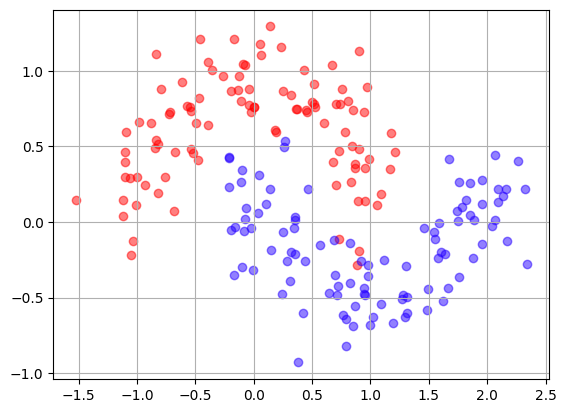

In [30]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.508525, 0.491475)

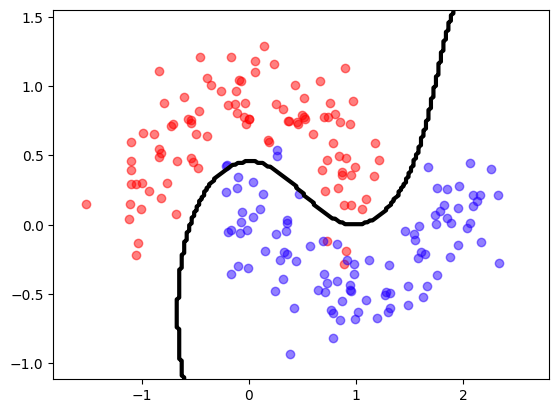

In [31]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [32]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [33]:
def fit_and_predict(estimator, X, y):
    assert len(X) == len(y), "X and y must have the same length"

    num = len(X)
    numfirst = num // 2
    X_first, X_second = X[:numfirst], X[numfirst:]
    y_first, y_second = y[:numfirst], y[numfirst:]

    estimator.fit(X_first, y_first)
    predictions = estimator.predict(X_second)

    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [34]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [35]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [36]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[0 1 0 7 4 4 3 2 7 1 7 4 9 4 6]


In [37]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True  True  True False  True  True  True  True False  True False  True
 False  True False]


and how we can select elements of a vector using a boolean vector of the same length

In [38]:
y[y_less_than_5]

array([0, 1, 0, 4, 4, 3, 2, 1, 4, 4])

In [39]:
y[y<5]

array([0, 1, 0, 4, 4, 3, 2, 1, 4, 4])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [40]:
v = np.random.randint(20, size=15)
v

array([ 6,  8,  9,  1,  9,  0, 19,  7, 16, 17,  8, 16,  9,  7, 19])

In [41]:
v[y<5]

array([ 6,  8,  9,  9,  0, 19,  7, 17, 16,  7])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [42]:

def select_per_class(X, y):


    X1 = X[y == 0]
    X2 = X[y == 1]


    return X1, X2

check manually your code

In [43]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [44]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [45]:

def accuracy(y_true, y_pred):

    result = np.mean(y_true == y_pred)

    return result

In [46]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [47]:

def split_fit_predict(estimator, X, y, train_pct):

    def split_data(X, y, pct):

      actual = len(X)
      actual_train = int(actual * pct)
      permutation = np.random.permutation(actual)
      X_train, Xts = X[permutation[:actual_train]], X[permutation[actual_train:]]
      y_train, yts = y[permutation[:actual_train]], y[permutation[actual_train:]]
      return X_train, Xts, y_train, yts

    def accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)

    X_train, Xts, y_train, yts = split_data(X, y, train_pct)
    estimator.fit(X_train, y_train)
    preds_test = estimator.predict(Xts)
    acc = accuracy(yts, preds_test)
    return estimator, Xts, yts, acc





In [48]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[ 1.38012598, -0.21040672],
        [-0.74356313,  0.45062601],
        [ 0.4955369 ,  0.97064623],
        [ 1.28793904, -0.59689797],
        [ 1.5709108 , -0.31814318],
        [ 0.07600553,  1.02540586],
        [-0.3742108 ,  0.5267454 ],
        [-0.75778912,  0.46590191],
        [ 0.99324246,  0.58004152],
        [ 1.25208881, -0.52210303]]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1]),
 0.9)

**submit your code**

In [49]:
student.submit_task(globals(), task_id="task_05");
